In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2021-10-06 07:37:25.435361: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


/kaggle/input/insurance/insurance.csv


In [2]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data = pd.get_dummies(data)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

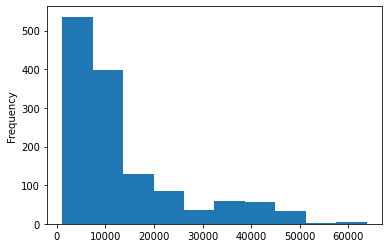

In [6]:
data['charges'].plot(kind = 'hist')

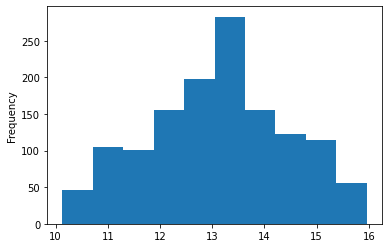

In [7]:
data["log_charges"] = np.log2(data["charges"] + 0.1)
data["log_charges"].plot(kind = 'hist')
data = data.drop(["charges"], axis=1)

In [8]:
y = data['log_charges']
X = data.drop(['log_charges'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state = 1)

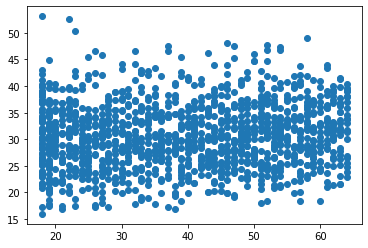

In [10]:
plt.scatter(data["age"], data["bmi"]);

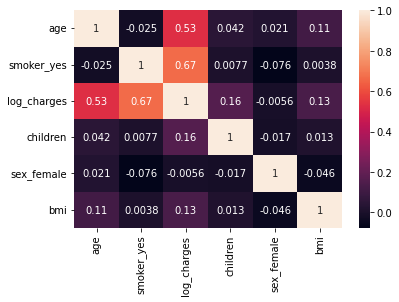

In [11]:
# Calculate and plot
numerical = list(
    set(data.columns)
    - {
        "sex_male",
        "smoker_no",
        "region_southwest",
        "region_northwest",
        "region_southeast",
        "region_northeast"
    }
)
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix, annot=True);

**From here we can conclude that smoking has direct correlation(0.67) with the medical charges, and then age has a correlation of 0.53**

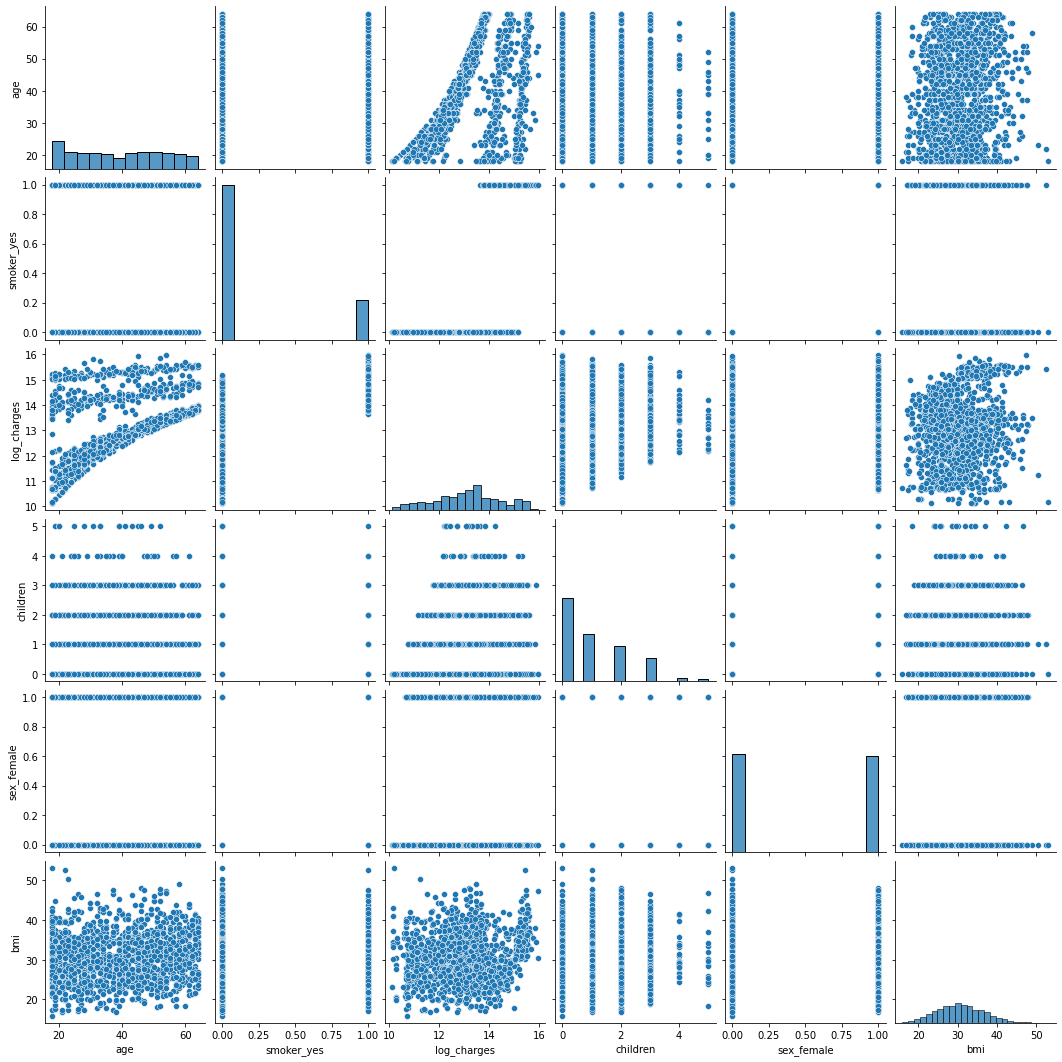

In [12]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[numerical]);

<AxesSubplot:xlabel='age', ylabel='log_charges'>

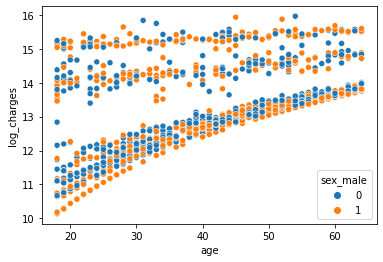

In [13]:
sns.scatterplot(data=data, x="age",y="log_charges", hue="sex_male")

# Standard scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn import metrics
scores = []

# **Linear Regression:**

In [16]:
modelLinR= LinearRegression(normalize = True)
modelLinR.fit(X_train_scaled,y_train)
y_pred_lin = modelLinR.predict(X_test_scaled)
error_LinR = metrics.mean_absolute_error(y_pred_lin, y_test)
print(error_LinR)
scores.append({"Linear Regression", error_LinR})

0.3845380978425162


# **Ridge Regression:**

In [17]:
modelRidR= Ridge()
modelRidR.fit(X_train_scaled,y_train)
y_pred_rid = modelRidR.predict(X_test_scaled)
error_RidR = metrics.mean_absolute_error(y_pred_rid, y_test)
print(error_RidR)
scores.append({"Ridge Regression", error_RidR})

0.38408577035331914


# **Random Forest Regression:**

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
model_rf = RandomForestRegressor(max_depth=15, n_estimators=10, max_features=5)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
error_rf = metrics.mean_absolute_error(y_pred_rf, y_test)
print(error_rf)
scores.append({"Random Forest Regression", error_rf})

0.27814374806538783


# **Gradient Boost Regression:**

In [19]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)
error_gb = metrics.mean_absolute_error(y_pred_gb, y_test)
print(error_gb)
scores.append({"Gradient Boosting Regression", error_gb})

0.24506436969876289


# **Extra Trees Regression:**

In [20]:
model_et = ExtraTreesRegressor()
model_et.fit(X_train_scaled, y_train)
y_pred_et = model_et.predict(X_test_scaled)
error_et = metrics.mean_absolute_error(y_pred_et, y_test)
print(error_et)
scores.append({"Extra Trees Regression", error_et})

0.26950965687717904


***From the above results, Gradient Boosting Regression works best for our dataset and has MAE equal to 0.245***